<a href="https://colab.research.google.com/github/nofiyamillatina/Praktikum-Struktur-Data/blob/main/Djikstra_Latihan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Instalasi Library
!pip install networkx matplotlib

In [3]:
# Struktur Data Graf dan Algoritma
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra_with_paths(graph, start):
  distances = {node: float('inf') for node in graph}
  distances [start] = 0
  previous = {node: None for node in graph}
  queue = [(0, start)]

  while queue:
    current_distance, current_node = heapq.heappop(queue)

    for neighbor, weight in graph[current_node].items():
      distance = current_distance + weight
      if distance < distances[neighbor]:
        distances[neighbor] = distance
        previous[neighbor] = current_node
        heapq.heappush(queue, (distance, neighbor))

  return distances, previous

In [4]:
# Fungsi untuk Merekontruksi Jalur
def get_path(previous, target):
  path = []
  while target is not None:
    path.insert(0, target)
    target = previous[target]
  return path

In [5]:
# Visualisasi dengan networkx dan matplotib
def visualize_graph(graph, path=None):
  G = nx.DiGraph()

  for node in graph:
    for neighbor, weight in graph[node].items():
      G.add_edge(node, neighbor, weight=weight)

  pos = nx.spring_layout(G)
  edge_labels = nx.get_edge_attributes(G, 'weight')

  plt.figure(figsize=(8, 6))
  nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_weight='bold', arrows=True)
  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

  # Garis tebal untuk jalur terpendek
  if path and len(path) > 1:
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)

  plt.title("Visualisasi Graf dan Jalur Terpendek")
  plt.axis('off')
  plt.show()

Jarak dari A ke Z: 14
Jalur A → B → D → E → Z


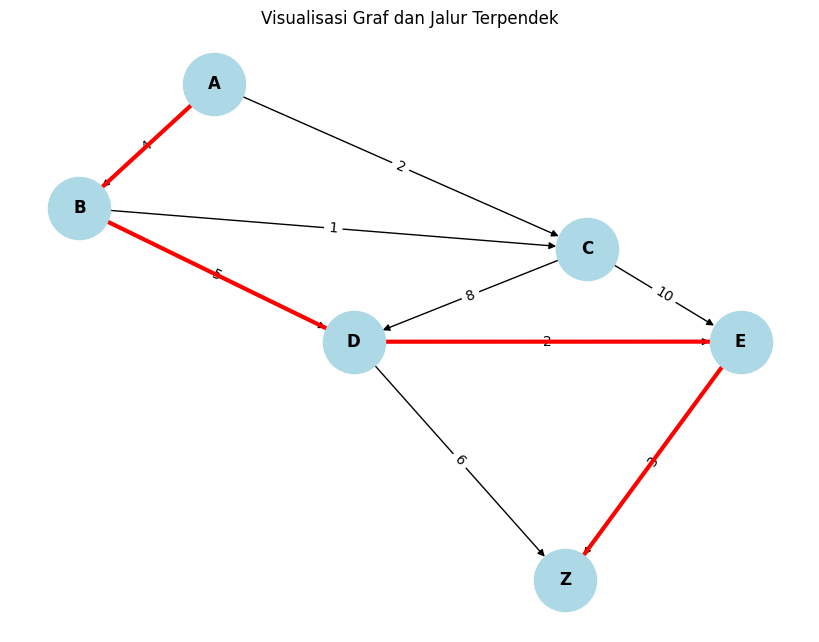

In [6]:
# Penggunaan Lengkap
# Definisi graf
graph = {
    'A':{'B': 4, 'C': 2},
    'B': {'C': 1, 'D': 5},
    'C': {'D': 8, 'E': 10},
    'D': {'E': 2, 'Z': 6},
    'E': {'Z': 3},
    'Z': {}
}

# Jalankan Dijkstra
start_node = 'A'
end_node = 'Z'
distances, previous = dijkstra_with_paths(graph, start_node)

# Rekontruksi Jalur
shortest_path = get_path(previous, end_node)
print(f"Jarak dari {start_node} ke {end_node}: {distances[end_node]}")
print(f"Jalur {' → '.join(shortest_path)}")

# Visualisasi
visualize_graph(graph, path=shortest_path)

# Tugas




*   Modifikasi graf agar memiliki siklus dan ulangi visualisasinya
*   Tambahkan simpul baru dan lihat bagaimana jalur terpendek berubah
*   Ganti tata letak graf dengan pos = nx.cicular_layout(G) atau kamada_kawai_layout.



Jarak dari A ke Z pada graf yang dimodifikasi: 14
Jalur pada graf yang dimodifikasi: A → B → D → E → Z

Visualisasi dengan circular_layout:


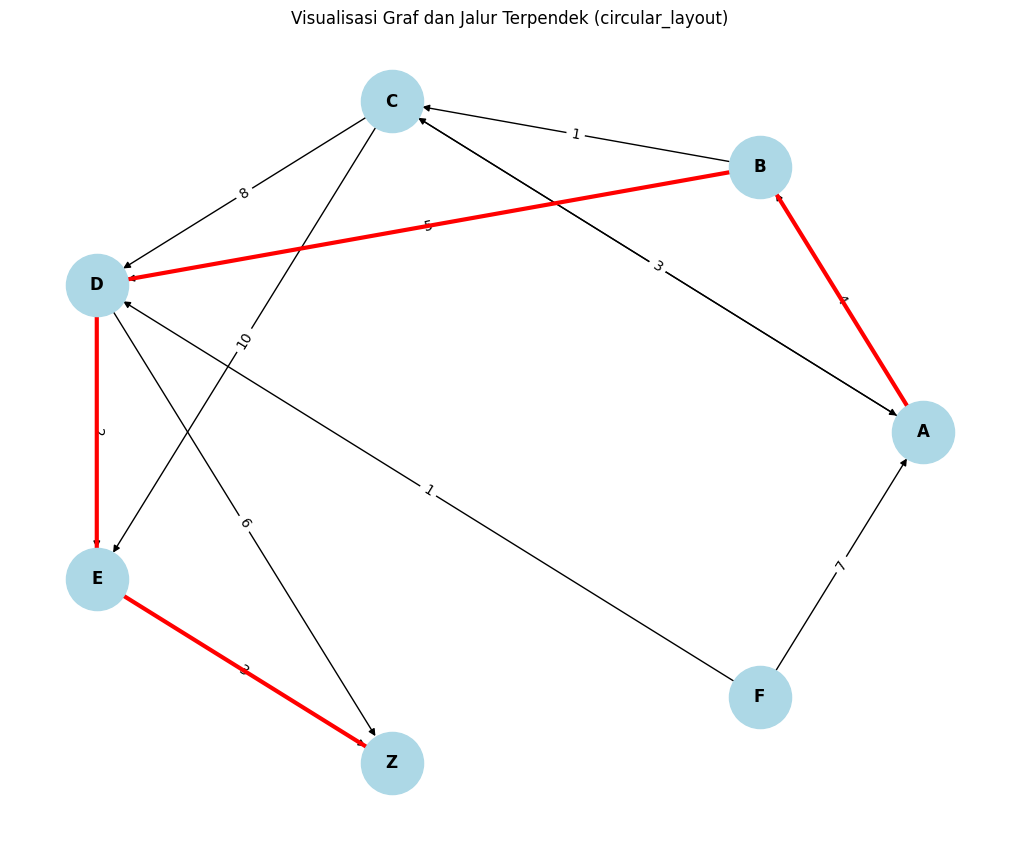

In [14]:
# Modifikasi graf dengan siklus dan simpul baru
graph_modified = {
    'A': {'B': 4, 'C': 2},
    'B': {'C': 1, 'D': 5},
    'C': {'D': 8, 'E': 10, 'A': 3},  # Menambahkan edge C->A untuk siklus
    'D': {'E': 2, 'Z': 6},
    'E': {'Z': 3},
    'Z': {},
    'F': {'A': 7, 'D': 1} # Menambahkan simpul baru 'F'
}

# Jalankan Dijkstra pada graf yang dimodifikasi
start_node_modified = 'A'
end_node_modified = 'Z'
distances_modified, previous_modified = dijkstra_with_paths(graph_modified, start_node_modified)

# Rekonstruksi Jalur pada graf yang dimodifikasi
shortest_path_modified = get_path(previous_modified, end_node_modified)
print(f"Jarak dari {start_node_modified} ke {end_node_modified} pada graf yang dimodifikasi: {distances_modified[end_node_modified]}")
print(f"Jalur pada graf yang dimodifikasi: {' → '.join(shortest_path_modified)}")

# Visualisasi graf yang dimodifikasi dengan layout spring_layout
def visualize_graph_with_layout(graph, path=None, layout_name='spring'):
  G = nx.DiGraph()

  for node in graph:
    for neighbor, weight in graph[node].items():
      G.add_edge(node, neighbor, weight=weight)

  if layout_name == 'circular':
      pos = nx.circular_layout(G)


  edge_labels = nx.get_edge_attributes(G, 'weight')

  plt.figure(figsize=(10, 8))
  nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_weight='bold', arrows=True)
  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

  # Garis tebal untuk jalur terpendek
  if path and len(path) > 1:
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)

  plt.title(f"Visualisasi Graf dan Jalur Terpendek ({layout_name}_layout)")
  plt.axis('off')
  plt.show()

# Visualisasi graf yang dimodifikasi dengan layout yang berbeda

print("\nVisualisasi dengan circular_layout:")
visualize_graph_with_layout(graph_modified, path=shortest_path_modified, layout_name='circular')